<a href="https://colab.research.google.com/github/nicolasPecora/AutomobileDataset-Regresion/blob/main/AutomobileDataset_Modelos_de_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementacion de modelos para predecir el valor de autos


# 1 Ajustes Iniciales

In [1]:
import pandas as pd
import numpy as np

#Definir que se puedan ver mas columnas
pd.set_option('display.max_columns', None)
#Definir que se puedan ver mas filas
pd.set_option('display.max_rows', None)

#Bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Carga del Dataset.




## 2.1 Carga de Datos
Fuente del dataset: https://archive.ics.uci.edu/dataset/10/automobile

[Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data)

Tipo de datos: csv



In [2]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [3]:
df = pd.read_csv(path, header=None)

In [4]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##2.2 Agregar encabezados
Esta información está disponible en: https://archive.ics.uci.edu/ml/datasets/Automobile


In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [6]:
# Reemplazo los encabezados
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# 3. Data Wrangling

Orden del Data Wrangling:

1. Identificar Datos Faltantes
2. Lidiar Con los Datos Faltantes
3. Formato de Datos Correcto

## 3.1 Identificación de datos Faltantes

Primero ecesitamos reemplazar el simbolo "?" con NaN para poder analizar correctamente los faltantes.

In [7]:
df.replace('?',np.NaN, inplace=True)
df.sample(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
155,0,91,toyota,gas,std,four,wagon,4wd,front,95.7,169.7,63.6,59.1,3110,ohc,four,92,2bbl,3.05,3.03,9.00,62,4800,27,32,8778
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.40,101,6000,17,23,11845
182,2,122,volkswagen,diesel,std,two,sedan,fwd,front,97.3,171.7,65.5,55.7,2261,ohc,four,97,idi,3.01,3.40,23.00,52,4800,37,46,7775
65,0,118,mazda,gas,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2670,ohc,four,140,mpfi,3.76,3.16,8.00,120,5000,19,27,18280
132,3,150,saab,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2658,ohc,four,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.00,106,4800,26,27,22470
64,0,115,mazda,gas,std,four,hatchback,fwd,front,98.8,177.8,66.5,55.5,2425,ohc,four,122,2bbl,3.39,3.39,8.60,84,4800,26,32,11245
95,1,128,nissan,gas,std,two,hatchback,fwd,front,94.5,165.6,63.8,53.3,2028,ohc,four,97,2bbl,3.15,3.29,9.40,69,5200,31,37,7799
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.70,NaN,NaN,23,31,9295
62,0,115,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,3.39,3.39,8.60,84,4800,26,32,10245


Ahora analizamos los datos faltantes:

In [8]:
datos_faltantes = df.isnull()
datos_faltantes.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Hago un conteo de los datos faltantes en cada columna:

In [9]:
dict_datos_faltantes = {}
for column in datos_faltantes.columns.values.tolist():
     if len(datos_faltantes[column].value_counts()) == 2:
        dict_datos_faltantes[column] = datos_faltantes[column].value_counts()[True]
print(dict_datos_faltantes)

{'normalized-losses': 41, 'num-of-doors': 2, 'bore': 4, 'stroke': 4, 'horsepower': 2, 'peak-rpm': 2, 'price': 4}


Siete Columnas tienen valores nulos


## 3.2 Tratar los datos Faltantes

### 3.2.1 "normalized-losses"

In [10]:
df[["normalized-losses"]].dtypes

normalized-losses    object
dtype: object

In [11]:
df[["normalized-losses"]].isnull().value_counts()

normalized-losses
False                164
True                  41
Name: count, dtype: int64

La columna "normalized-losses" es el pago de perdidas promedio relativo por año de vehiculo asegurado. Esta normalizada para todos los vehiculos de una categoria de tamaño determinada y representa la perdida promedio por vehiculo por año. Hay un dato crucial faltante para la reconstruccion de estos datos y es que no tengo datos de los años de los autos. Ademas representa el 25% de datos faltantes de la columna.
Ante esta situacion, opto por desestimar la columna.

In [12]:
df = df.drop("normalized-losses", axis=1)
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 3.2.2 "num-of-doors"

In [13]:
df[df["num-of-doors"].isna()]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [14]:
# De aqui saco que el naftero turbo es de 4 puertas
df.groupby(["body-style", "fuel-type", "aspiration"])[["num-of-doors"]].value_counts()

body-style   fuel-type  aspiration  num-of-doors
convertible  gas        std         two              6
hardtop      diesel     turbo       two              1
             gas        std         two              7
hatchback    diesel     std         four             1
             gas        std         two             47
                                    four             9
                        turbo       two             13
sedan        diesel     std         four             3
                                    two              2
                        turbo       four             9
             gas        std         four            59
                                    two             13
                        turbo       four             8
wagon        diesel     turbo       four             3
             gas        std         four            20
                        turbo       four             2
Name: count, dtype: int64

In [15]:
# Con esta busqueda deduzco que tambien son 4 puertas
df[(df["make"]=="mazda") & (df["body-style"]=="sedan") & (df["fuel-type"] == "diesel")]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
63,0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
66,0,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,four,134,idi,3.43,3.64,22.0,72,4200,31,39,18344


In [16]:
# Cambio los datos
df.loc[df["num-of-doors"].isna(), "num-of-doors"] = "four"

### 3.2.3 "bore" y "Stroke"

In [17]:
#Aqui confirmo que "bore" y "stroke" faltan por igual
df[df["bore"].isna()]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


Observo que la columna "bore" y "Stroke" pertenece a los mazda nafteros.  Empiezo a filtrar por caracteristicas similares.

In [18]:
df[df["bore"].notnull()
& (df["symboling"] == 3)
& (df["fuel-type"]=="gas")
& (df["num-of-doors"]=="two")
& (df["drive-wheels"] == "rwd")
& (df["body-style"] == "hatchback")]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
104,3,nissan,gas,std,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3071,ohcv,six,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199
105,3,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
124,3,plymouth,gas,turbo,two,hatchback,rwd,front,95.9,173.2,66.3,50.2,2818,ohc,four,156,spdi,3.59,3.86,7.0,145,5000,19,24,12764
125,3,porsche,gas,std,two,hatchback,rwd,front,94.5,168.9,68.3,50.2,2778,ohc,four,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018
178,3,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,2976,dohc,six,171,mpfi,3.27,3.35,9.3,161,5200,20,24,16558
179,3,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016,dohc,six,171,mpfi,3.27,3.35,9.3,161,5200,19,24,15998


Reemplazo por las medias de "bore" y "Stroke"

In [19]:
media_bore = df[df["bore"].notnull() &
 (df["symboling"] == 3) &
  (df["fuel-type"]=="gas") &
   (df["num-of-doors"]=="two") &
    (df["drive-wheels"] == "rwd") &
     (df["body-style"] == "hatchback")]["bore"].astype("float").mean().round(2)
media_bore = str(media_bore)
media_bore

'3.49'

In [20]:
media_stroke = df[df["stroke"].notnull() &
 (df["symboling"] == 3) &
  (df["fuel-type"]=="gas") &
   (df["num-of-doors"]=="two") &
    (df["drive-wheels"] == "rwd") &
     (df["body-style"] == "hatchback")]["stroke"].astype("float").mean().round(2)
media_stroke = str(media_stroke)
media_stroke

'3.37'

In [21]:
# Reemplazo en el dataframe
df["bore"].replace(np.nan, media_bore, inplace=True)
df["stroke"].replace(np.nan, media_stroke, inplace=True)

In [22]:
# Chequeo los cambios
df.iloc[55:59]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.49,3.37,9.4,101,6000,17,23,10945
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.49,3.37,9.4,101,6000,17,23,11845
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,3.49,3.37,9.4,101,6000,17,23,13645
58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,3.49,3.37,9.4,135,6000,16,23,15645


### 3.2.4 "horsepower" - "peak-rpm"

In [23]:
df[df['horsepower'].isna()] #Confirmo que las columnas "horsepower" y "peak-rpm" coinciden

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
131,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


In [24]:
# Para el dato 130 saco los promedios de aqui
df[ (df["num-of-doors"] == "four")
& (df["body-style"] == "wagon")
& (df["fuel-type"] == "gas")
& (df["symboling"] == 0)
& (df["drive-wheels"] == "fwd")
& (df["num-of-cylinders"] == "four")
& (df["horsepower"].notnull())]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
36,0,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,58.3,2024,ohc,four,92,1bbl,2.92,3.41,9.2,76,6000,30,34,7295
146,0,subaru,gas,std,four,wagon,fwd,front,97.0,173.5,65.4,53.0,2290,ohcf,four,108,2bbl,3.62,2.64,9.0,82,4800,28,32,7463
147,0,subaru,gas,std,four,wagon,fwd,front,97.0,173.5,65.4,53.0,2455,ohcf,four,108,mpfi,3.62,2.64,9.0,94,5200,25,31,10198
153,0,toyota,gas,std,four,wagon,fwd,front,95.7,169.7,63.6,59.1,2280,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918
193,0,volkswagen,gas,std,four,wagon,fwd,front,100.4,183.1,66.9,55.1,2563,ohc,four,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290


In [25]:
media_horsepower_130 = df[ (df["num-of-doors"] == "four")
& (df["body-style"] == "wagon")
& (df["fuel-type"] == "gas")
& (df["symboling"] == 0)
& (df["drive-wheels"] == "fwd")
& (df["num-of-cylinders"] == "four")
& (df["horsepower"].notnull())]["horsepower"].astype("float").mean().round(2)

media_horsepower_130 = str(int(media_horsepower_130))
media_horsepower_130


'80'

In [26]:
media_peak_130 = df[ (df["num-of-doors"] == "four")
& (df["body-style"] == "wagon")
& (df["fuel-type"] == "gas")
& (df["symboling"] == 0)
& (df["drive-wheels"] == "fwd")
& (df["num-of-cylinders"] == "four")
& (df["horsepower"].notnull())]["peak-rpm"].astype("float").mean().round(2)

media_peak_130 = str(int(media_peak_130))
media_peak_130

'5260'

In [27]:
# Para el dato 131
df[ (df["num-of-doors"] == "two")
& (df["body-style"] == "hatchback")
& (df["fuel-type"] == "gas")
& (df["symboling"] == 2)
& (df["drive-wheels"] == "fwd")
& (df["num-of-cylinders"] == "four")]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
30,2,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1713,ohc,four,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479
31,2,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1819,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000,31,38,6855
76,2,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,1918,ohc,four,92,2bbl,2.97,3.23,9.4,68,5500,37,41,5389
77,2,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,1944,ohc,four,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6189
78,2,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,2004,ohc,four,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6669
131,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895
138,2,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118
139,2,subaru,gas,std,two,hatchback,fwd,front,93.7,157.9,63.6,53.7,2120,ohcf,four,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7053


In [28]:
media_horsepower_131 = df[ (df["num-of-doors"] == "two")
& (df["body-style"] == "hatchback")
& (df["fuel-type"] == "gas")
& (df["symboling"] == 2)
& (df["drive-wheels"] == "fwd")
& (df["num-of-cylinders"] == "four")
& (df["horsepower"].notnull())]["horsepower"].astype("float").mean().round()

media_horsepower_131 = str(int(media_horsepower_131))
media_horsepower_131

'69'

In [29]:
media_peak_131 = df[ (df["num-of-doors"] == "two")
& (df["body-style"] == "hatchback")
& (df["fuel-type"] == "gas")
& (df["symboling"] == 2)
& (df["drive-wheels"] == "fwd")
& (df["num-of-cylinders"] == "four")
& (df["horsepower"].notnull())]["peak-rpm"].astype("float").mean().round(2)

media_peak_131 = str(int(media_peak_131))
media_peak_131

'5228'

Reemplazo en el dataframe

In [30]:
media_horsepower_130

'80'

In [31]:
df.loc[130 , "horsepower"] = media_horsepower_130
df.loc[130 , "peak-rpm"] = media_peak_130
df.loc[131 , "horsepower"] = media_horsepower_131
df.loc[131 , "peak-rpm"] = media_peak_131

In [32]:
df.iloc[130]

symboling                  0
make                 renault
fuel-type                gas
aspiration               std
num-of-doors            four
body-style             wagon
drive-wheels             fwd
engine-location        front
wheel-base              96.1
length                 181.5
width                   66.5
height                  55.2
curb-weight             2579
engine-type              ohc
num-of-cylinders        four
engine-size              132
fuel-system             mpfi
bore                    3.46
stroke                  3.90
compression-ratio        8.7
horsepower                80
peak-rpm                5260
city-mpg                  23
highway-mpg               31
price                   9295
Name: 130, dtype: object

### 3.2.4 "price"

In [33]:
# Elimino las filas porque no me sirven al ser la variable que quiero averiguar
df = df.dropna(subset=["price"], axis=0)
df.isnull().count()


symboling            201
make                 201
fuel-type            201
aspiration           201
num-of-doors         201
body-style           201
drive-wheels         201
engine-location      201
wheel-base           201
length               201
width                201
height               201
curb-weight          201
engine-type          201
num-of-cylinders     201
engine-size          201
fuel-system          201
bore                 201
stroke               201
compression-ratio    201
horsepower           201
peak-rpm             201
city-mpg             201
highway-mpg          201
price                201
dtype: int64

In [34]:
df.reset_index(drop=True, inplace=True)
df.tail(10)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
191,-1,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
192,-2,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
193,-1,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
194,-2,volvo,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
195,-1,volvo,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
196,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
200,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


## 3.1 Formato de datos Correcto

In [35]:
df.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

De aqui observamos tipos de datos incorrectos:

| Columna | Tipo de Valor | Valor Correcto |
|---------|---------------|----------------|
| bore | object | float |
| stroke | object | float |
| horsepower | object | int |
| peak-rpm | object | int |
| price | object | int |

In [36]:
df[["horsepower", "peak-rpm", "price"]] = df[["horsepower", "peak-rpm", "price"]].astype("int")

<ipython-input-36-9a24dc41a3bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["horsepower", "peak-rpm", "price"]] = df[["horsepower", "peak-rpm", "price"]].astype("int")


In [37]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")

<ipython-input-37-3e102c72f8e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")


# 4 Analisis de Datos Exploratorio (EDA)

## 4.1 Variables Numericas

In [38]:
correlacion = df.corr(numeric_only= True)
correlacion

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.119035,0.004318,-0.182196,0.073411,0.279690,-0.035527,0.036233,-0.082391
wheel-base,-0.535987,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.484678,0.153645,0.250313,0.373543,-0.361281,-0.470606,-0.543304,0.584642
length,-0.365404,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.601846,0.120741,0.159733,0.575143,-0.284809,-0.665192,-0.698142,0.690628
width,-0.242423,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.541938,0.187934,0.189867,0.610667,-0.244942,-0.633531,-0.680635,0.751265
height,-0.550160,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.159547,-0.072913,0.259737,-0.082379,-0.310473,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.638517,0.165207,0.156433,0.756386,-0.279398,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.555045,0.196193,0.028889,0.819185,-0.256337,-0.650546,-0.679571,0.872335
bore,-0.119035,0.484678,0.601846,0.541938,0.159547,0.638517,0.555045,1.000000,-0.050982,-0.001015,0.561474,-0.243235,-0.595659,-0.602712,0.541005
stroke,0.004318,0.153645,0.120741,0.187934,-0.072913,0.165207,0.196193,-0.050982,1.000000,0.186254,0.082944,-0.045077,-0.043416,-0.042760,0.081996
compression-ratio,-0.182196,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,-0.001015,0.186254,1.000000,-0.210957,-0.436534,0.331425,0.268465,0.071107


<Axes: >

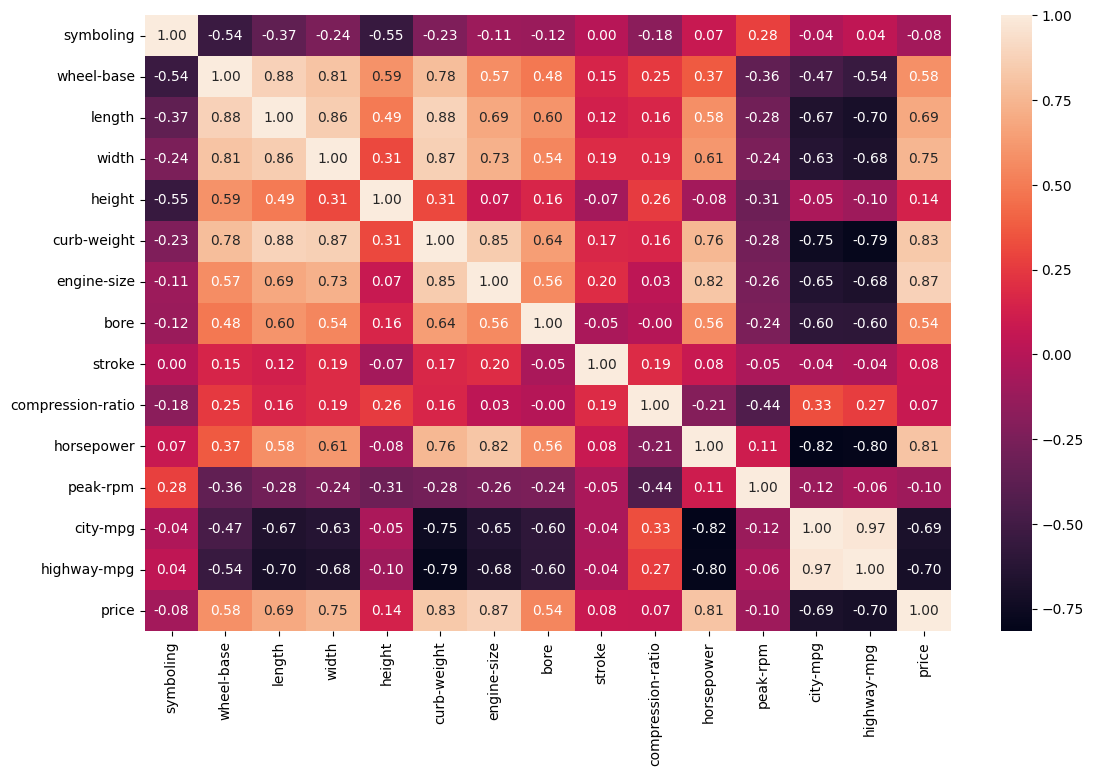

In [39]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('price')))
df = df.reindex(columns=cols)

fig, ax = plt.subplots(figsize=(13,8))
sns.heatmap(correlacion, annot = True, fmt=".2f")

Tomo solamentes las que tienen aproximadamente una correlacion superior a +-0.70

In [40]:
variables_numericas = df[["price", "length", "width", "curb-weight", "engine-size", "horsepower", "city-mpg", "highway-mpg"]]
variables_numericas.head()

,price,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg
0,13495,168.8,64.1,2548,130,111,21,27
1,16500,168.8,64.1,2548,130,111,21,27
2,16500,171.2,65.5,2823,152,154,19,26
3,13950,176.6,66.2,2337,109,102,24,30
4,17450,176.6,66.4,2824,136,115,18,22


Chequeo la distribucion de datos

(Text(0.5, 0, 'Precios'),)

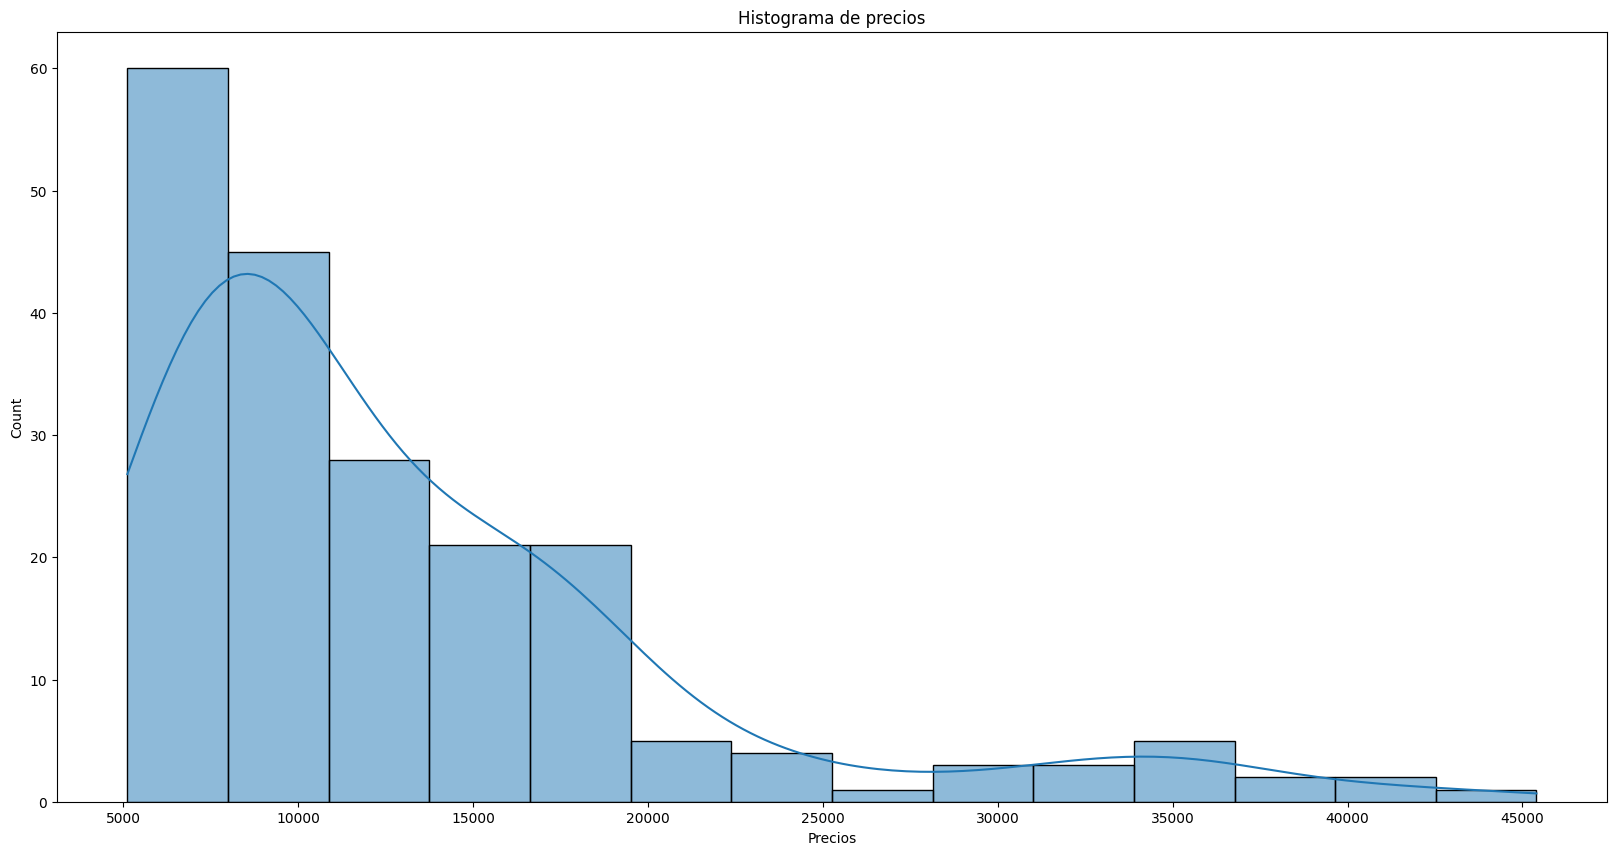

In [41]:
ax = sns.histplot(data=variables_numericas, x = 'price', kde=True)
ax.figure.set_size_inches(20,10)
ax.set_title('Histograma de precios')
ax.set_xlabel('Precios'),

In [42]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
datos_transformados = transformer.transform(variables_numericas)
datos_transformados = pd.DataFrame(datos_transformados, columns=variables_numericas.columns)
datos_transformados.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,price,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg
0,9.510149,5.134621,4.175925,7.843456,4.875197,4.718499,3.091042,3.332205
1,9.711176,5.134621,4.175925,7.843456,4.875197,4.718499,3.091042,3.332205
2,9.711176,5.148657,4.197202,7.945910,5.030438,5.043425,2.995732,3.295837
3,9.543306,5.179534,4.207673,7.757051,4.700480,4.634729,3.218876,3.433987
4,9.767152,5.179534,4.210645,7.946264,4.919981,4.753590,2.944439,3.135494


(Text(0.5, 0, 'Precios'),)

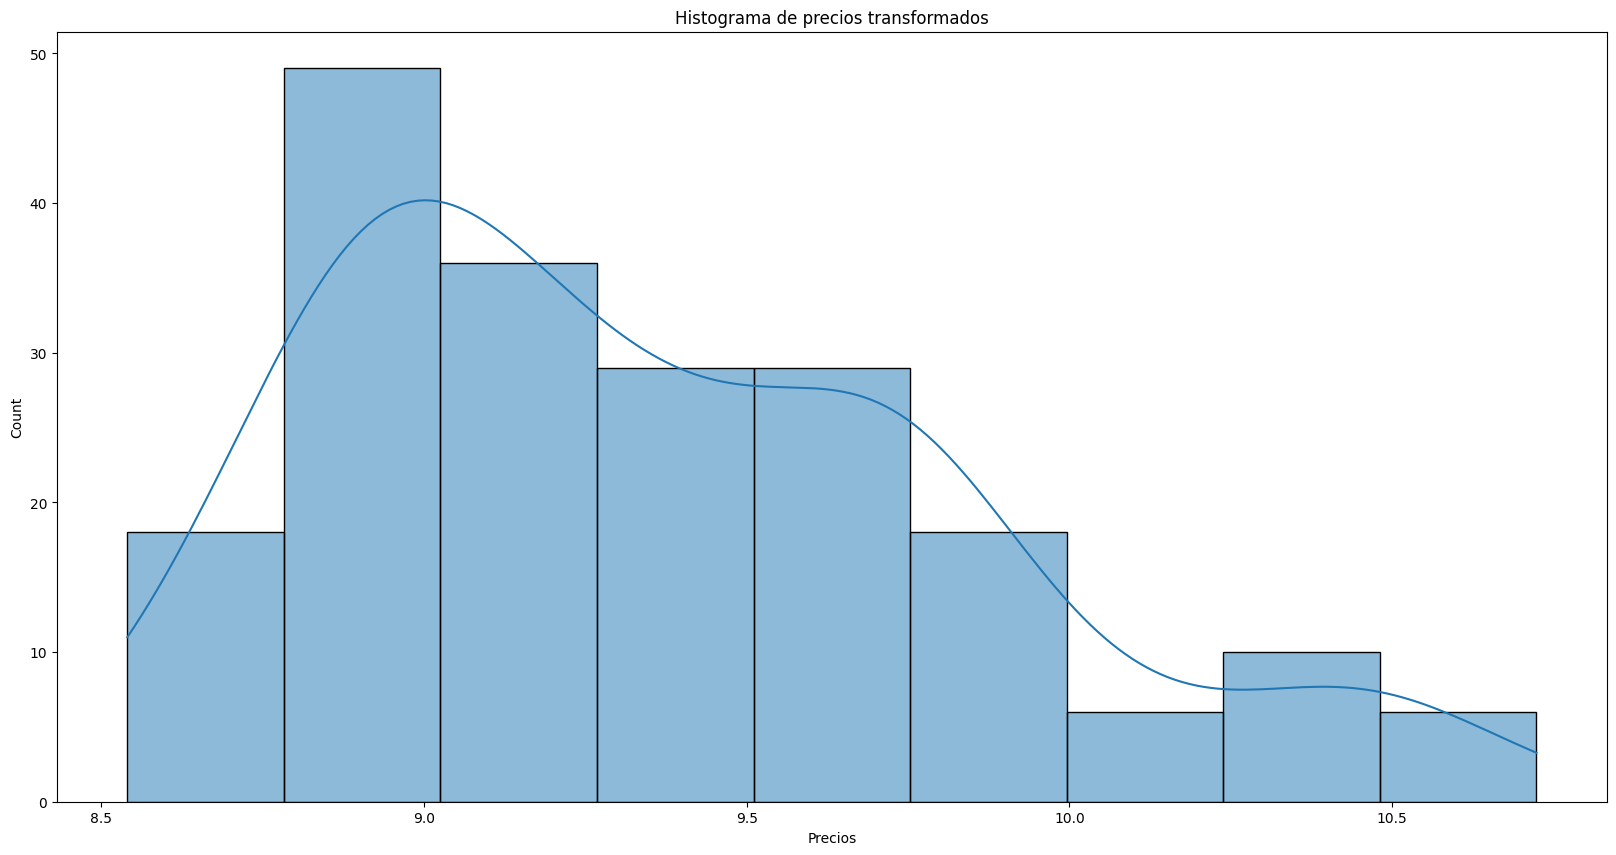

In [43]:
ax = sns.histplot(data=datos_transformados, x = 'price', kde=True)
ax.figure.set_size_inches(20,10)
ax.set_title('Histograma de precios transformados')
ax.set_xlabel('Precios'),

## 4.2 Variables Categoricas

In [44]:
variables_categoricas = df.select_dtypes(include=["object"])
variables_categoricas["price"] = df["price"]
variables_categoricas.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450


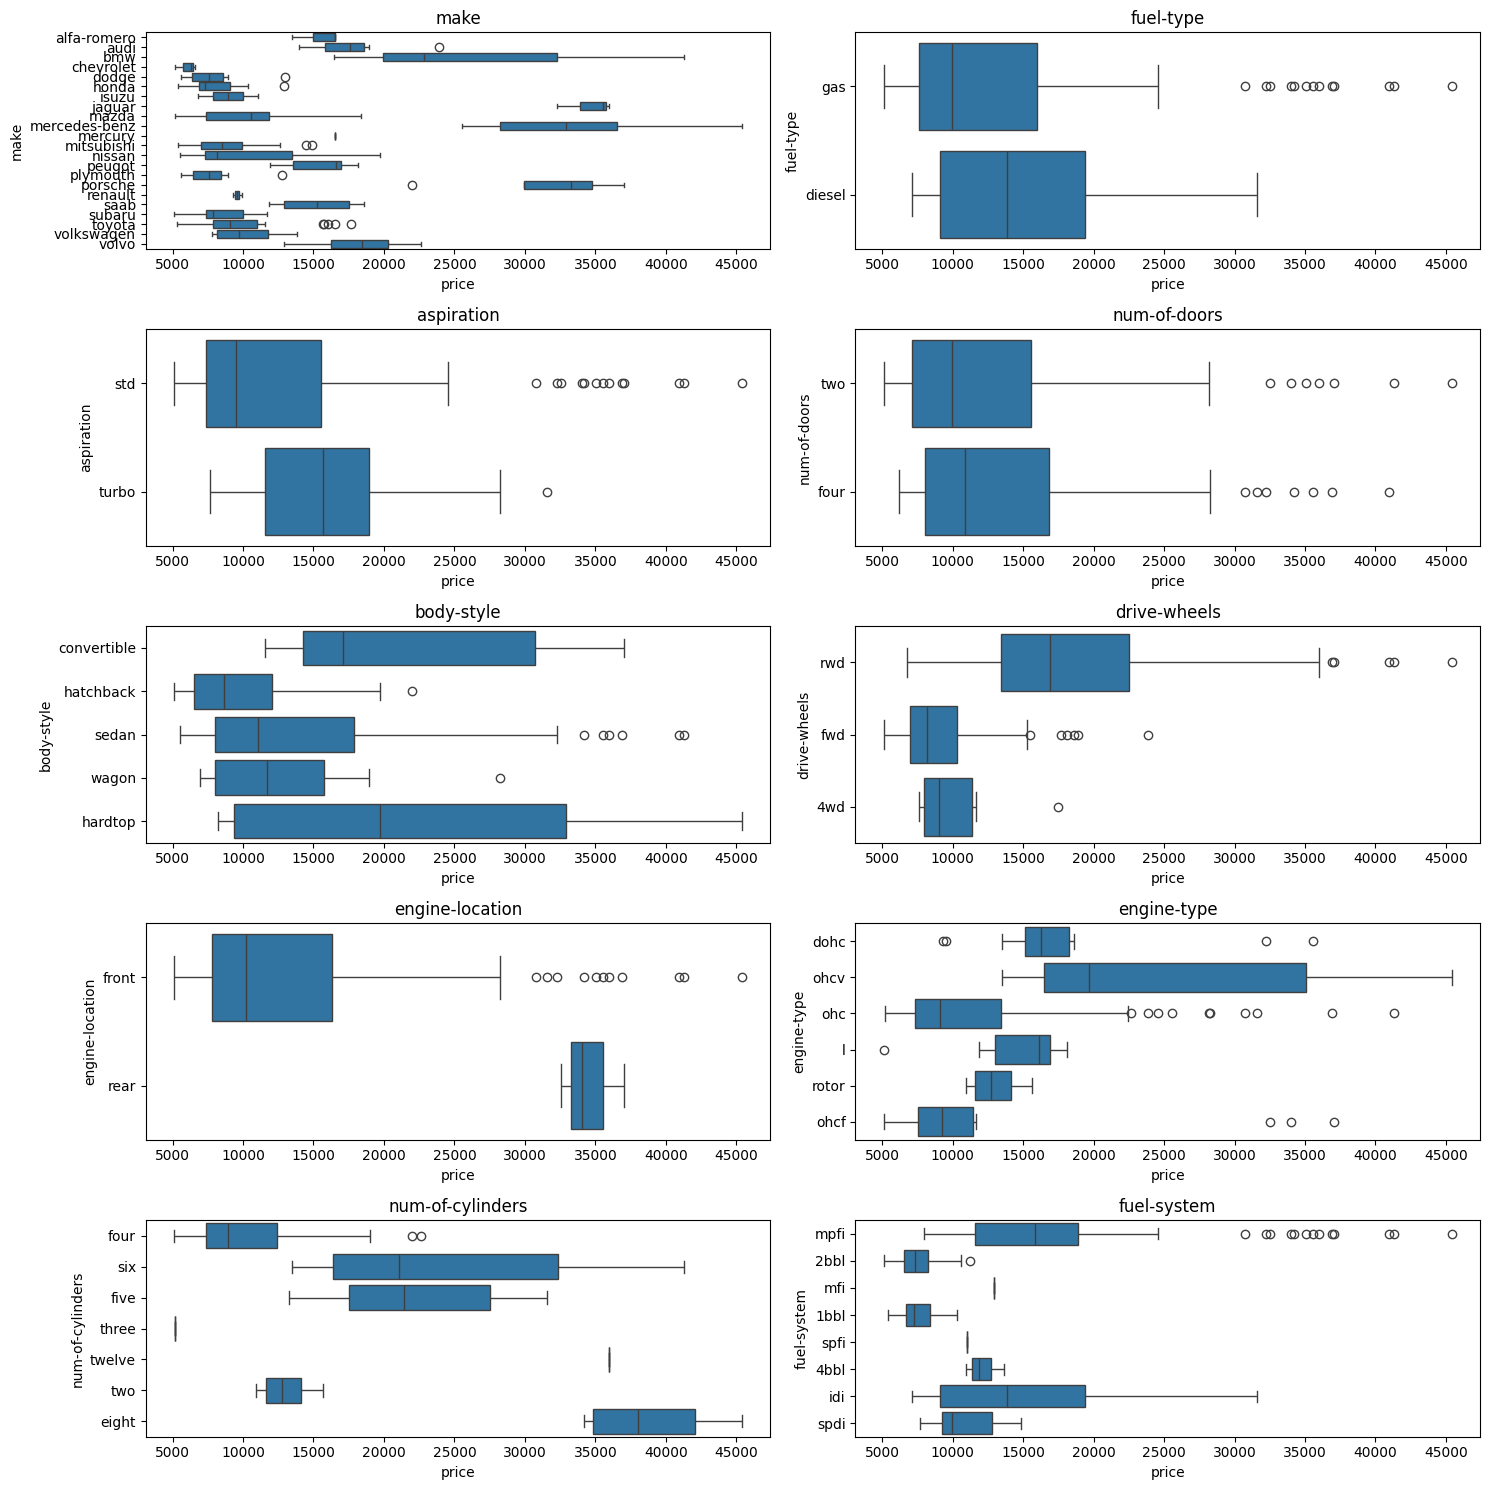

In [45]:
fig, axes = plt.subplots(5,2, figsize=(15,15))
axes = axes.flatten()
for i, variable in enumerate(variables_categoricas):
    if variable != "price":
      sns.boxplot(data=variables_categoricas, x = "price", y = variable, ax = axes[i])
      axes[i].set_title(variable)
fig.tight_layout()

A simple vista "Drive Wheels" y "Engine Location" Servirian para el modelo. Realizo el test ANOVA par corroborarlos.

In [46]:
test_grupo_1 = variables_categoricas[["drive-wheels","price"]]

In [47]:
datos_rwd = variables_categoricas[variables_categoricas["drive-wheels"] == "rwd"]["price"]
datos_fwd = variables_categoricas[variables_categoricas["drive-wheels"] == "fwd"]["price"]
datos_4wd = variables_categoricas[variables_categoricas["drive-wheels"] == "4wd"]["price"]


In [48]:
from scipy import stats
anova_results1 = stats.f_oneway(datos_rwd, datos_fwd, datos_4wd)
anova_results1

F_onewayResult(statistic=67.95406500780398, pvalue=3.3945443577151245e-23)

In [49]:
datos_front = variables_categoricas[variables_categoricas["engine-location"] == "front"]["price"]
datos_rear = variables_categoricas[variables_categoricas["engine-location"] == "rear"]["price"]

In [50]:
anova_results2 = stats.f_oneway(datos_front, datos_rear)
anova_results2

F_onewayResult(statistic=24.495550318865693, pvalue=1.583490019777699e-06)

Las dos variables sirven, porque su valor F es mayor a 1 y el valor P es menos a 0.05

In [51]:
df_dummies = pd.get_dummies(variables_categoricas[["drive-wheels", "engine-location"]], dtype = float)
df_dummies.head()

,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear
0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0


## 4.3 Dataframe Final

In [52]:
df_cars = pd.concat([datos_transformados, df_dummies], axis=1)
df_cars.head()

,price,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear
0,9.510149,5.134621,4.175925,7.843456,4.875197,4.718499,3.091042,3.332205,0.0,0.0,1.0,1.0,0.0
1,9.711176,5.134621,4.175925,7.843456,4.875197,4.718499,3.091042,3.332205,0.0,0.0,1.0,1.0,0.0
2,9.711176,5.148657,4.197202,7.945910,5.030438,5.043425,2.995732,3.295837,0.0,0.0,1.0,1.0,0.0
3,9.543306,5.179534,4.207673,7.757051,4.700480,4.634729,3.218876,3.433987,0.0,1.0,0.0,1.0,0.0
4,9.767152,5.179534,4.210645,7.946264,4.919981,4.753590,2.944439,3.135494,1.0,0.0,0.0,1.0,0.0


In [53]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  201 non-null    float64
 1   length                 201 non-null    float64
 2   width                  201 non-null    float64
 3   curb-weight            201 non-null    float64
 4   engine-size            201 non-null    float64
 5   horsepower             201 non-null    float64
 6   city-mpg               201 non-null    float64
 7   highway-mpg            201 non-null    float64
 8   drive-wheels_4wd       201 non-null    float64
 9   drive-wheels_fwd       201 non-null    float64
 10  drive-wheels_rwd       201 non-null    float64
 11  engine-location_front  201 non-null    float64
 12  engine-location_rear   201 non-null    float64
dtypes: float64(13)
memory usage: 20.5 KB


# 5 Division del set de datos

## 5.1 Division para entrenamiento del modelo

In [54]:
# Variables Independientes
x = df_cars.drop("price", axis="columns")

# Variables Dependientes
y = df_cars["price"]

In [55]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   length                 201 non-null    float64
 1   width                  201 non-null    float64
 2   curb-weight            201 non-null    float64
 3   engine-size            201 non-null    float64
 4   horsepower             201 non-null    float64
 5   city-mpg               201 non-null    float64
 6   highway-mpg            201 non-null    float64
 7   drive-wheels_4wd       201 non-null    float64
 8   drive-wheels_fwd       201 non-null    float64
 9   drive-wheels_rwd       201 non-null    float64
 10  engine-location_front  201 non-null    float64
 11  engine-location_rear   201 non-null    float64
dtypes: float64(12)
memory usage: 19.0 KB


In [56]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 201 entries, 0 to 200
Series name: price
Non-Null Count  Dtype  
--------------  -----  
201 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 198 to 102
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   length                 160 non-null    float64
 1   width                  160 non-null    float64
 2   curb-weight            160 non-null    float64
 3   engine-size            160 non-null    float64
 4   horsepower             160 non-null    float64
 5   city-mpg               160 non-null    float64
 6   highway-mpg            160 non-null    float64
 7   drive-wheels_4wd       160 non-null    float64
 8   drive-wheels_fwd       160 non-null    float64
 9   drive-wheels_rwd       160 non-null    float64
 10  engine-location_front  160 non-null    float64
 11  engine-location_rear   160 non-null    float64
dtypes: float64(12)
memory usage: 16.2 KB


## 5.2 Division para la Cross validation

In [59]:
# Division del DataSet en tres pedazos
from sklearn.model_selection import KFold
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

# 6 Regresion Lineal

## 6.1 Implementación del Modelo

In [60]:
from sklearn.linear_model import LinearRegression

# Inicio el modelo
lr = LinearRegression()


In [61]:
# Entrenamiento
lr.fit(x_train, y_train)

LinearRegression()

In [62]:
#Prueba
prediccion_lr = lr.predict(x_test)

In [63]:
# Resultado de la predicción
prediccion_lr

array([ 8.84480682, 10.10930728,  8.78472   ,  8.95097053,  9.45125489,
        8.7321069 , 10.19847056,  9.25934429,  9.88645923, 10.33699347,
       10.01360741,  8.98898428,  9.51418499,  9.20540673,  9.48788138,
        8.95447315,  9.25697638,  8.9299761 ,  9.2137859 , 10.29766172,
       10.38988728, 10.29443695,  8.80548777,  8.8380814 , 10.05881165,
        9.14082067,  9.27750957, 10.14988409, 10.39911476,  9.58807706,
        9.34211354,  8.71491772,  9.5065581 ,  8.86656123,  8.94624804,
        9.7394942 ,  8.92258432,  9.03337371,  9.51074941,  9.01928543,
        9.57200016])

## 6.2 Metricas del modelo

### 6.2.1 R2Score

In [64]:
# importar la biblioteca
from sklearn.metrics import r2_score

In [65]:
r2_lr = r2_score(y_test, prediccion_lr)
r2_lr

0.9012573580260484

###6.2.2 Cross validation

In [66]:
from sklearn.model_selection import cross_val_score
accuracy_cross_val_r2_lr = cross_val_score(estimator = lr, X = x_train, y = y_train, cv = cv, scoring = "r2")
accuracy_cross_val_r2_lr

array([0.87616918, 0.85031516, 0.84748967, 0.80590479, 0.86830301])

In [67]:
print(f"Accuracy promedio de r2 {round(accuracy_cross_val_r2_lr.mean(),2)}")

Accuracy promedio de r2 0.85


# 7 Arbol de decision

## 7.1 Implementacion del modelo

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
# Inicializando el modelo
dtr = DecisionTreeRegressor(random_state = 42, max_depth = 5)

In [70]:
# Entrenamiento
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [71]:
# Prueba
prediccion_dtr = dtr.predict(x_test)

In [72]:
# Resultado de la prediccion
prediccion_dtr

array([ 8.84931161, 10.35765363,  8.6539669 ,  8.99872942,  9.5943573 ,
        8.76874363, 10.14851001,  9.1738692 ,  9.74052148, 10.35765363,
       10.14851001,  8.99872942,  9.5943573 ,  8.99872942,  9.5943573 ,
        8.99872942,  9.22596409,  8.93745132,  8.99872942, 10.14851001,
       10.38988728, 10.14851001,  8.76874363,  8.84931161, 10.14851001,
        9.22596409,  9.1738692 , 10.14851001, 10.38988728,  9.74052148,
        9.73660618,  8.6539669 ,  9.41755469,  8.76874363,  8.83232174,
        9.5943573 ,  8.83232174,  8.99872942,  9.1738692 ,  9.1738692 ,
        9.74052148])

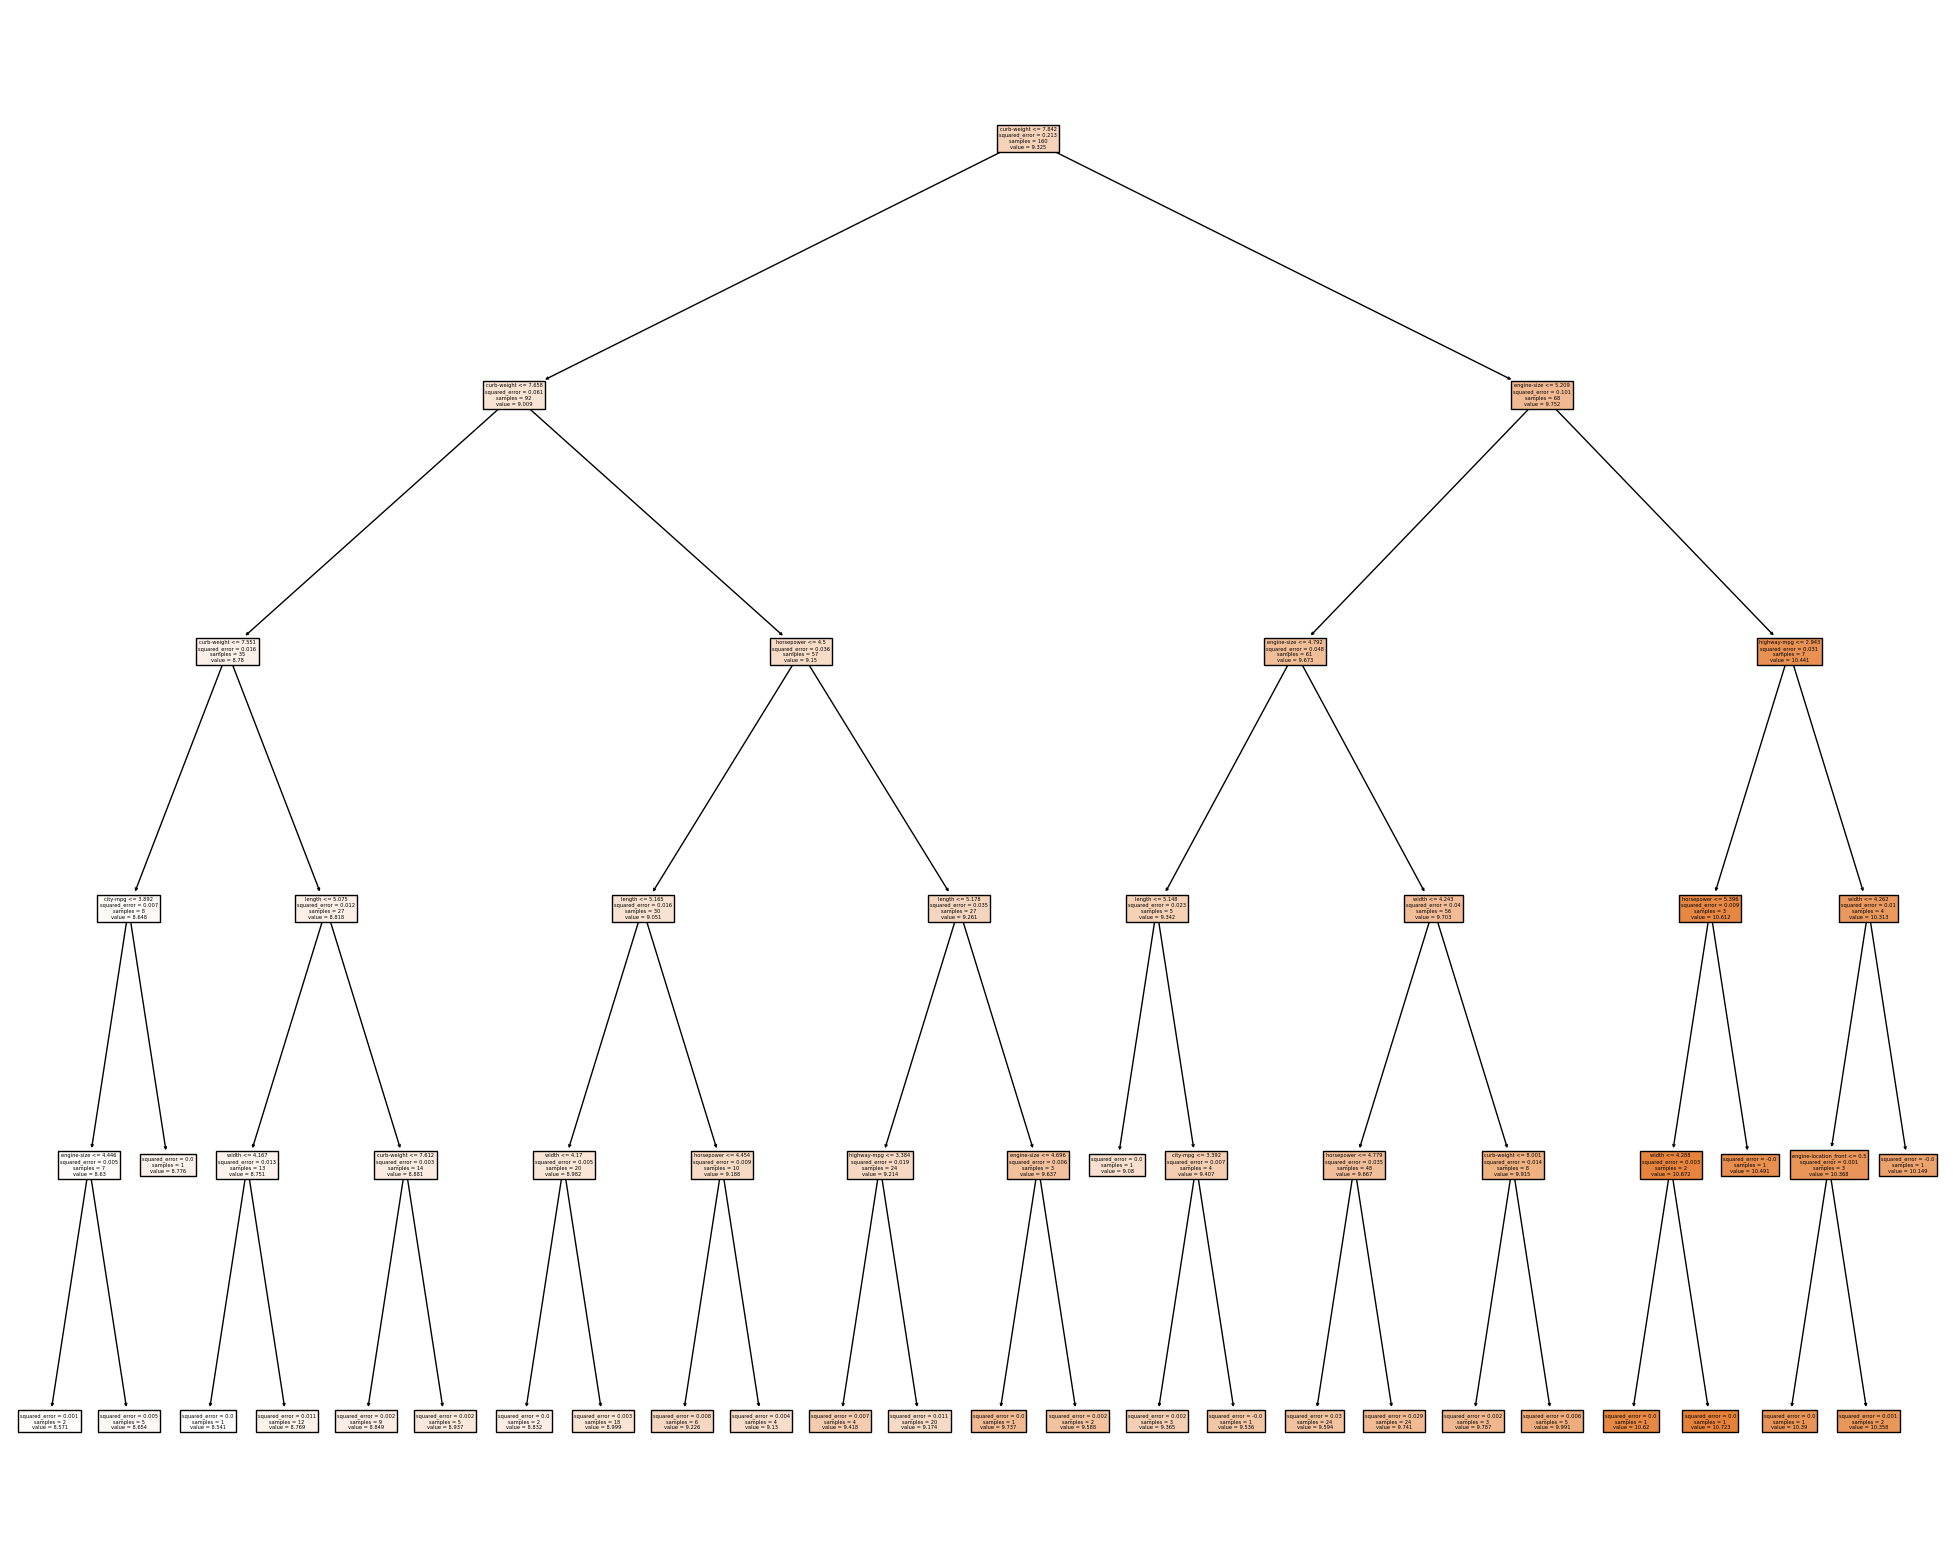

In [73]:

from sklearn import tree
# Grafico el arbol
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtr, feature_names=list(x.columns.values),
               class_names = list(y.values), filled = True)
plt.show()

## 7.2 Metricas del modelo

### 7.2.1 Grafico Error prediccion

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


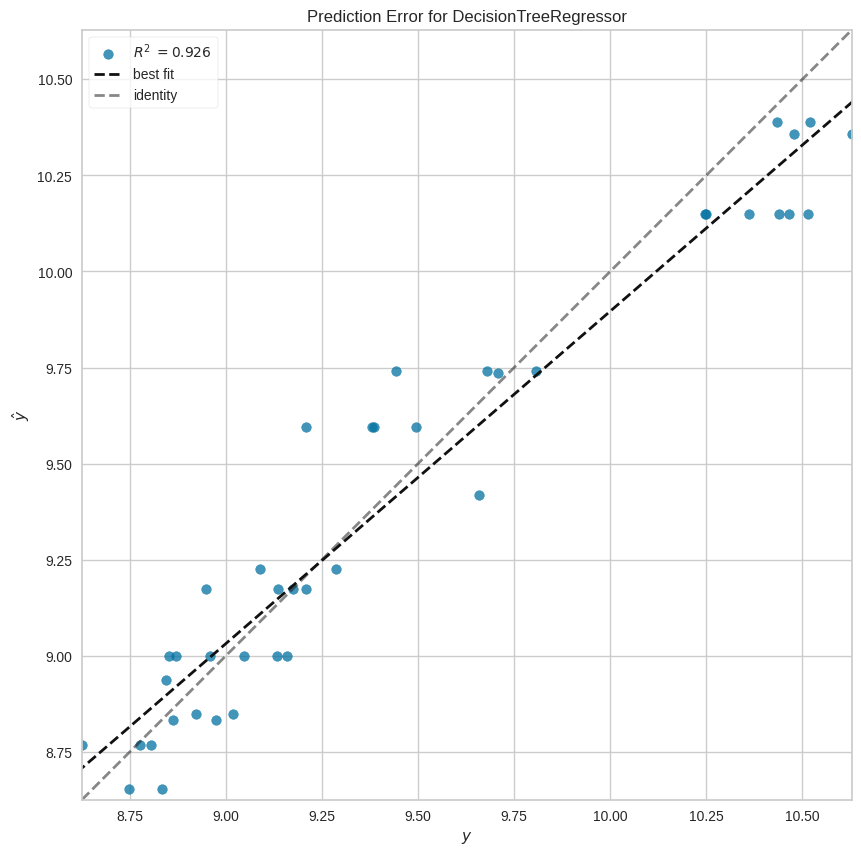

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [74]:
# Grafico de error de prediccion
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
visualizador = PredictionError(dtr)
visualizador.fit(x_train, y_train)
visualizador.score(x_test, y_test)
visualizador.poof()

###7.2.2 R2 score

In [75]:
r2_dtr = r2_score(y_test, prediccion_dtr)
r2_dtr

0.9257243466386472

### 7.2.3 Cross Validation

In [76]:
from sklearn.model_selection import cross_val_score
accuracy_cross_val_r2_dtr = cross_val_score(estimator = dtr, X = x_train, y = y_train, cv = cv, scoring = "r2")
accuracy_cross_val_r2_dtr

array([0.74716494, 0.81099683, 0.81960705, 0.76839205, 0.90568361])

In [77]:
print(f"Accuracy promedio de r2 {round(accuracy_cross_val_r2_dtr.mean(),2)}")

Accuracy promedio de r2 0.81


#8 Random Forest

##8.1 Implementacion del modelo

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rf = RandomForestRegressor(n_estimators=10, random_state=42, max_depth=5)

In [80]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [81]:
prediccion_dtr = rf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


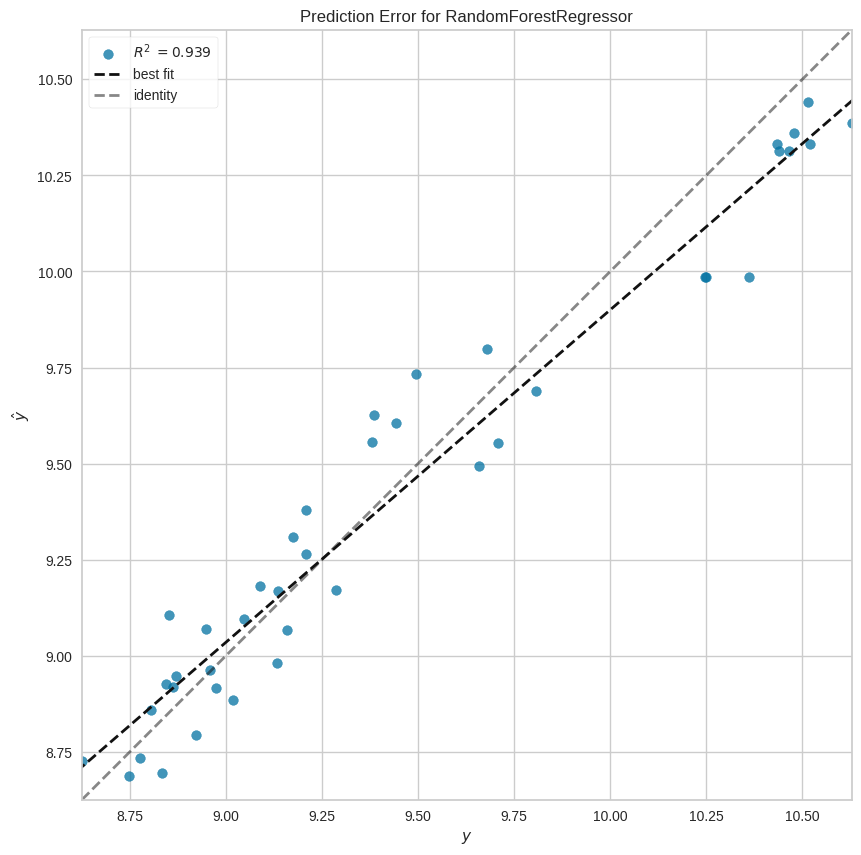

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [82]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
visualizador = PredictionError(rf)
visualizador.fit(x_train, y_train)
visualizador.score(x_test, y_test)
visualizador.poof()

In [83]:
r2_rf = r2_score(y_test, prediccion_dtr)
r2_rf

0.9390939435498993

In [84]:
accuracy_cross_val_r2_rf = cross_val_score(estimator = rf, X = x_train, y = y_train, cv = cv, scoring = "r2")
accuracy_cross_val_r2_rf

array([0.85778432, 0.88299839, 0.89667209, 0.78974325, 0.9109486 ])

In [85]:
print(f"Accuracy promedio de r2 {round(accuracy_cross_val_r2_rf.mean(),2)}")

Accuracy promedio de r2 0.87


# 9. Red Neuronal

## 9.1 Red neuronal de una sola capa oculta

In [86]:
import tensorflow as tf

In [87]:
x_train.shape

(160, 12)

In [88]:
capa = tf.keras.layers.Dense(units=1, input_shape=[12])
rn_1 = tf.keras.Sequential([capa])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
rn_1.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'
)

In [90]:
entrenamiento_rn_1 = rn_1.fit(x_train, y_train, epochs=400, verbose=False)

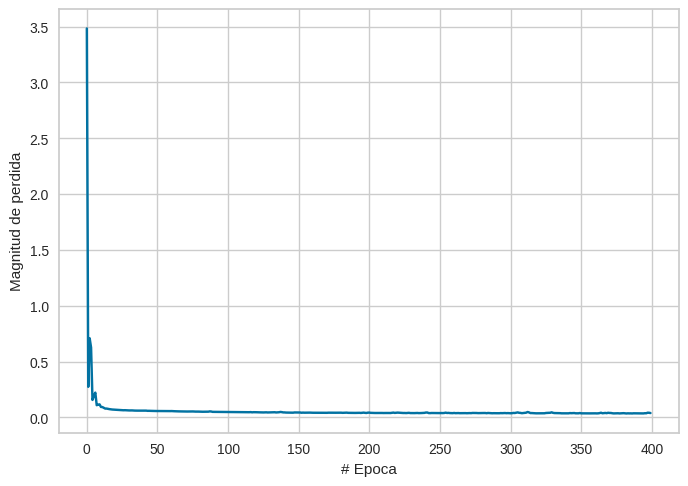

In [91]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(entrenamiento_rn_1.history["loss"])

In [92]:
prediccion_rn_1 = rn_1.predict([x_test])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [93]:
rn_1.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0590


0.05686064064502716

In [94]:
r2_rn_1 = r2_score(y_test, prediccion_rn_1)
r2_rn_1

0.8535107330627223

## 9.2 Red Neuronal de dos Capas Ocultas

In [95]:
# Creo dos capas de 3 neuronas en la primera y una en la segunda
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[12])
oculta2 = tf.keras.layers.Dense(units=1)
salida = tf.keras.layers.Dense(units=1)

# Implemento la Red
rn_2 = tf.keras.Sequential([oculta1, oculta2, salida])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
#Complilo la red
rn_2.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'
)

In [97]:
entrenamiento_rn_2 = rn_2.fit(x_train, y_train, epochs=400, verbose=False)

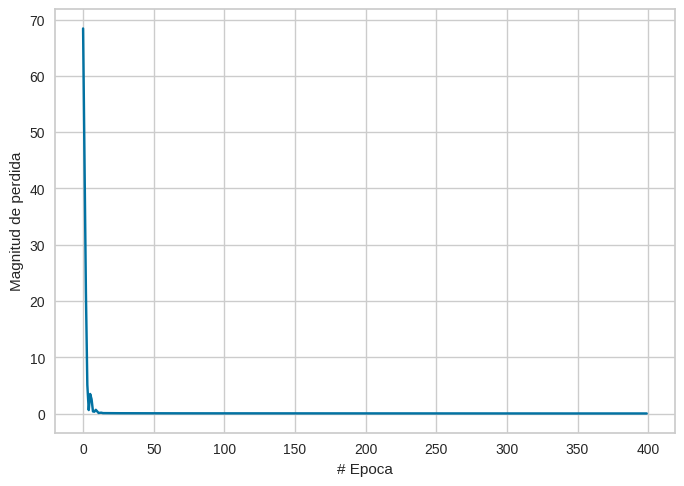

In [98]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(entrenamiento_rn_2.history["loss"])

In [99]:
prediccion_rn_2 = rn_2.predict([x_test])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [100]:
rn_2.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0473  


0.0476934053003788

In [101]:
r2_rn_2 = r2_score(y_test, prediccion_rn_2)
r2_rn_2

0.8771281681538111

# 10. Conclusion

Resultados de los modelos implementados

In [102]:
print("R2-score de la regresion lineal:", r2_lr)
print("R2-score del arbol de decision:", r2_dtr)
print("R2-score del random forest:", r2_rf)
print("R2-score de la red neuronal de una sola capa:", r2_rn_1)
print("R2-score de la red neuronal de dos capas:", r2_rn_2)
print("-" * 30)
print("Accuracy promedio de r2 del regresion lineal:", round(accuracy_cross_val_r2_lr.mean(),2))
print("Accuracy promedio de r2 del arbol de decision:", round(accuracy_cross_val_r2_dtr.mean(),2))
print("Accuracy promedio de r2 del random forest:", round(accuracy_cross_val_r2_rf.mean(),2))

R2-score de la regresion lineal: 0.9012573580260484
R2-score del arbol de decision: 0.9257243466386472
R2-score del random forest: 0.9390939435498993
R2-score de la red neuronal de una sola capa: 0.8535107330627223
R2-score de la red neuronal de dos capas: 0.8771281681538111
------------------------------
Accuracy promedio de r2 del regresion lineal: 0.85
Accuracy promedio de r2 del arbol de decision: 0.81
Accuracy promedio de r2 del random forest: 0.87


Probamos las predicciones de los tres modelos con un dato al azar


In [103]:
prueba_columnas = list(['price',
 'length',
 'width',
 'curb-weight',
 'engine-size',
 'horsepower',
 'city-mpg',
 'highway-mpg',
 'drive-wheels',
 'engine-location'])

In [104]:
df.iloc[95][prueba_columnas]

price               8249
length             162.4
width               63.8
curb-weight         2008
engine-size           97
horsepower            69
city-mpg              31
highway-mpg           37
drive-wheels         fwd
engine-location    front
Name: 95, dtype: object

In [105]:
precio_prueba, datos_prueba = 8249,[162.4, 63.8, 2008, 97, 69, 31, 37, 0, 1, 0, 1, 0]


In [106]:
df_prueba = pd.DataFrame([datos_prueba], columns=x_train.columns)
df_prueba

,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear
0,162.4,63.8,2008,97,69,31,37,0,1,0,1,0


In [107]:
transformer = FunctionTransformer(np.log1p, validate=True)
datos_transformados_prueba = transformer.transform(df_prueba.iloc[:,0:7])
df_prueba.iloc[0, :7] = datos_transformados_prueba
df_prueba

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
<ipython-input-107-1140b5b8accf>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7.60539236]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_prueba.iloc[0, :7] = datos_transformados_prueba
<ipython-input-107-1140b5b8accf>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4.58496748]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_prueba.iloc[0, :7] = datos_transformados_prueba
<ipython-input-107-1140b5b8accf>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4.24849524]' has dtype incompatible with int64, please expli

,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear
0,5.096201,4.171306,7.605392,4.584967,4.248495,3.465736,3.637586,0,1,0,1,0


In [108]:
precio_prueba = df.iloc[95]["price"]
precio_prueba

8249

In [109]:
# Prediccion Con regresion lineal
prediccion_prueba_lr = lr.predict(df_prueba)
np.expm1(prediccion_prueba_lr)

array([6937.26361218])

In [110]:
# Prediccion con arbol de decision
prediccion_prueba_dtr = dtr.predict(df_prueba)
np.expm1(prediccion_prueba_dtr)

array([6968.58949737])

In [111]:
#Prediccion con Random Forest
prediccion_prueba_rf = rf.predict(df_prueba)
np.expm1(prediccion_prueba_rf)

array([7215.00628691])

In [112]:
#Prediccion con Red Neuronal de una sola capa
prediccion_prueba_rn_1 = rn_1.predict(df_prueba)
np.expm1(prediccion_prueba_rn_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[6931.786]], dtype=float32)

In [113]:
#Prediccion con Red Neuronal de dos capas
prediccion_prueba_rn_2 = rn_2.predict(df_prueba)
np.expm1(prediccion_prueba_rn_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[7391.5986]], dtype=float32)

En los tests Random Forest dio como el mejor algoritmo para este Dataset. Luego en las predicciones estan muy cerca las redes Neuronales.
Por costo computacional y resultados, Random Forest es el mejor modelo a implementar en este caso.